### Plot the evolution of kinetic energy and potentail vorticity in the 2-layer QG spin up simulation 

In [1]:
import numpy as np
import dask
import xarray as xr
import zarr

import matplotlib.pyplot as plt
import holoviews as hv
from holoviews.operation.datashader import regrid

In [26]:
%matplotlib inline

In [33]:
# Load particle history zarr files
ds = xr.open_zarr('/burg/abernathey/users/hillary/lcs/spin_up/spin_up.zarr')
ds

<xarray.Dataset>
Dimensions:     (time: 720, l: 512, k: 257, lev: 2, lev_mid: 1, y: 512, x: 512)
Coordinates:
  * k           (k) float64 0.0 5.236e-06 1.047e-05 ... 0.00133 0.001335 0.00134
  * l           (l) float64 0.0 5.236e-06 1.047e-05 ... -1.047e-05 -5.236e-06
  * lev         (lev) int64 1 2
  * lev_mid     (lev_mid) float64 1.5
  * time        (time) timedelta64[ns] 5 days 10 days ... 3595 days 3600 days
  * x           (x) float64 1.172e+03 3.516e+03 ... 1.196e+06 1.199e+06
  * y           (y) float64 1.172e+03 3.516e+03 ... 1.196e+06 1.199e+06
Data variables: (12/21)
    APEflux     (time, l, k) float64 dask.array<chunksize=(1, 512, 257), meta=np.ndarray>
    APEgen      (time) float64 dask.array<chunksize=(1,), meta=np.ndarray>
    APEgenspec  (time, l, k) float64 dask.array<chunksize=(1, 512, 257), meta=np.ndarray>
    EKE         (time, lev) float64 dask.array<chunksize=(1, 2), meta=np.ndarray>
    EKEdiss     (time) float64 dask.array<chunksize=(1,), meta=np.ndarray>
    Ensspec     (time, lev, l, k) float64 dask.array<chunksize=(1, 2, 512, 257), meta=np.ndarray>
    ...          ...
    u           (time, lev, y, x) float64 dask.array<chunksize=(1, 2, 512, 512), meta=np.ndarray>
    ufull       (time, lev, y, x) float64 dask.array<chunksize=(1, 2, 512, 512), meta=np.ndarray>
    uh          (time, lev, l, k) complex128 dask.array<chunksize=(1, 2, 512, 257), meta=np.ndarray>
    v           (time, lev, y, x) float64 dask.array<chunksize=(1, 2, 512, 512), meta=np.ndarray>
    vfull       (time, lev, y, x) float64 dask.array<chunksize=(1, 2, 512, 512), meta=np.ndarray>
    vh          (time, lev, l, k) complex128 dask.array<chunksize=(1, 2, 512, 257), meta=np.ndarray>
Attributes: (12/23)
    pyqg:L:          1200000
    pyqg:M:          262144
    pyqg:W:          1200000
    pyqg:beta:       1.3e-11
    pyqg:del2:       0.8
    pyqg:delta:      0.25
    ...              ...
    pyqg:tavestart:  86400
    pyqg:tc:         518400
    pyqg:tmax:       311040000
    pyqg:twrite:     50000
    reference:       https://pyqg.readthedocs.io/en/latest/index.html
    title:           pyqg: Python Quasigeostrophic Model

In [37]:
ds['time'] = ds.time.dt.days#/365

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
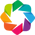

:DynamicMap   [time]
   :Image   [x,y]   (q)

In [35]:
hv.extension('bokeh', 'matplotlib')
im = (hv.Dataset(ds.q[:,0,:,:]).to(hv.Image, ['x', 'y'], name='PV', dynamic=True)
                .redim.range(q=(-6e-5, 6e-5)).options(cmap='RdBu_r', width=700, height=350, colorbar=True, 
                         tools=['hover'], toolbar='above', title='Potential Vorticity Anomaly'))
hv.output(widget_location='top')
regrid(im, precompute=True) 


### Plot snapshots of PV anomaly evolution

In [ ]:
# Evolution of the upper PV anomaly field

plt.rcParams.update({'font.size': 10})
plt.rcParams['image.cmap'] = 'RdBu'

ints = [0, 20, 50, 100]
fig = plt.figure(figsize=(10,8))
for i in enumerate(ints):
    ax = plt.subplot(1,4,i[0]+1)
    plt.pcolormesh(ds.q[i[1],0,:,:])
    plt.title(ds.time[i[1]].values.astype('timedelta64[D]'), color='k') # The titles correspond to the model time in years. 
    plt.xlabel('x')
    plt.ylabel('y')
    ax.set_aspect('equal')
    
fig.tight_layout()

# plt.savefig('/burg/home/hs3277/lcs-ml/media/spin_up_PV.png', bbox_inches='tight')

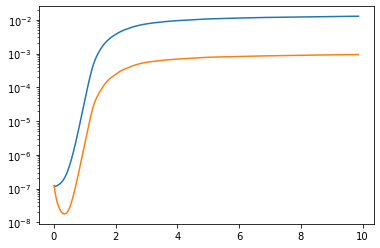

In [43]:
plt.semilogy(ds.time, ds.EKE[:,0])
plt.semilogy(ds.time, ds.EKE[:,1])

Text(0.5, 0, 'model time (year)')

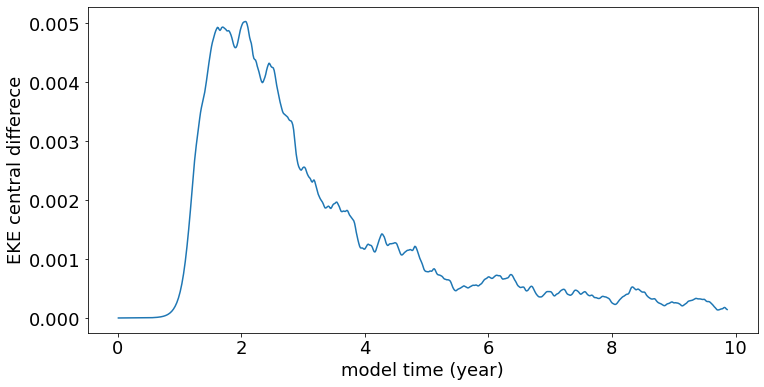

In [44]:
# Mean Eddy Kinetic Energy (EKE) as a function of time
dEKE_dt = np.gradient(ds.EKE.isel(lev=0), ds.time)

# Plot EKE derivative
plt.rcParams.update({'font.size': 18})
plt.figure(figsize=(12,6)); plt.plot(ds.time, dEKE_dt)
plt.ylabel('EKE central differece'); plt.xlabel('model time (year)')
# plt.axvline(x=time_stable/year, color='k', linestyle='--')




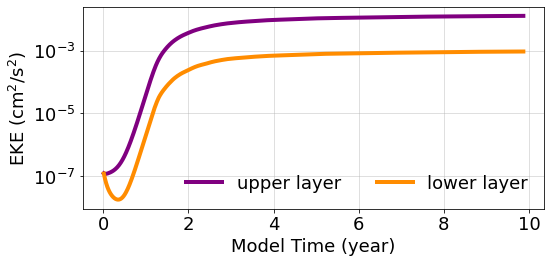

In [47]:
# Plot time series of EKE
fig = plt.figure(figsize=(8,4))
plt.semilogy(ds.time, ds.EKE.isel(lev=0), lw=4, color='purple', label='upper layer')
plt.semilogy(ds.time, ds.EKE.isel(lev=1), lw=4, color='darkorange', label='lower layer')
plt.grid(True, alpha=0.5); plt.legend(frameon=False, ncol=2)
plt.ylabel(r'EKE ($\rmcm^{2}$/$\rms^{2}$)'); plt.xlabel('Model Time (year)');
fig.tight_layout()
# plt.savefig('/burg/home/hs3277/lcs-ml/images/spin_up_EKE.png', bbox_inches='tight')


As the model gets spun up, the mean EKE increases until it reaches an equilibrated state. When the EKE plateaus the model is in a stable state.

In [ ]:
# Save model state at equilibrium
I = int(np.where(np.abs(ds.time - time_stable)==np.min(np.abs(ds.time - time_stable)))[0])
qg_equilibrium = ds[dict(time=I)]

path = '/burg/abernathey/users/hillary/'
qg_equilibrium.to_netcdf(path+'QG_equilibrium_proto.nc', engine='h5netcdf', invalid_netcdf=True)